# One-Class SVM Anomaly Detection

This notebook demonstrates how to identify anomalies using one-class SVM.

## Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm

## Define colors and generate dataset

In [2]:
# Set random seed for reproducibility.
np.random.seed(42)

# Define the colors to be used in the plot.
colors = [
    "#2580B7", # Blue
    "#C03B26", # Red
    "#44546A", # Gray
]

# Generate 100 samples for the cluster with some outliers.
cluster_samples = np.random.normal(loc=0.0, scale=1.0, size=(100, 2))
outliers = np.random.uniform(low=-4, high=4, size=(10, 2))
data = np.vstack((cluster_samples, outliers))

## Train One-Class SVM

In [3]:
# Fit the model.
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(data)

# Predict the labels (1 for inliers, -1 for outliers).
predictions = clf.predict(data)
outliers = predictions == -1

## Visualization

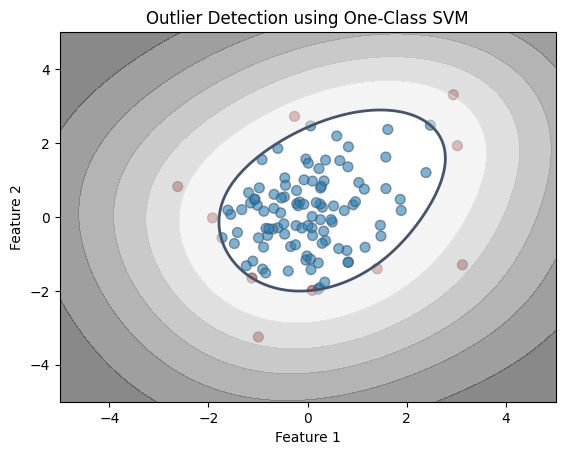

In [4]:
# Create a mesh grid for plotting decision boundary.
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the results.
plt.scatter(
    data[:, 0], data[:, 1],
    c=np.where(outliers, colors[1], colors[0]),
    s=50, edgecolor=colors[-1], alpha=0.6
)

# Plot decision boundary and margins.
plt.contour(
    xx, yy, Z, levels=[0], linewidths=2, colors=colors[-1]
)
plt.contourf(
    xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap="gray", alpha=0.5)

plt.title("Outlier Detection using One-Class SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()